In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import math
import time
%matplotlib inline

In [61]:
# Считаем данные
data = np.array([])
with open('servers.txt' , 'r' ) as f:
    for s in f:
        data = np.append(data, float(s))

l = data[0]
data = data[1:]
t0 = 1
t = 60

# Введем события
events = []
for tim in data:
    # Поломки
    events.append((tim, 1))
for tim in range(0, t + 1, t0):
    # Просто сообщить матожидание
    events.append((tim, 0))
    
events = sorted(events, key=lambda e: e[0])

$E(N_t - N_s) = \lambda(t - s)$ (т.к. $N_t - N_s \sim Pois(\lambda(t - s))$)
$E(N_t | N_s) = E(N_t - N_s | N_s) + E(N_s | N_s) = E(N_t - N_s) + N_s = \lambda(t - s) + N_s$ (т.к. $N_t - N_s$ и $N_s$ независимы)

Сопряженное распределение для $Exp(\lambda)$: $\Gamma(\alpha, \beta)$

Значит Байесовская оценка $\frac{\alpha + n - 1}{\beta + \sum_{x \in X}x}$

Посмотрим на гамма распределение при различных $\alpha, \beta$

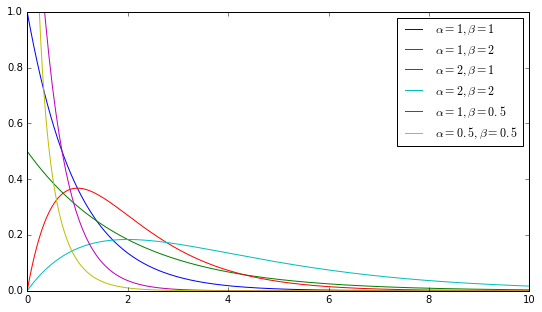

In [62]:
grid = np.linspace(0, 10, 300)
params = [(1, 1), (1, 2), (2, 1), (2, 2), (1, 0.5), (0.5, 0.5)]
plt.figure(figsize=(9, 5))
for a, b in params:
    label = '$\\alpha =' + str(a) + ', \\beta = ' + str(b) + '$'
    plt.plot(grid, sps.gamma(a, scale=b).pdf(grid), label=label)
plt.legend(loc='best')
plt.ylim((0, 1))
plt.show()

Если $\lambda$ неизвестен, то точки экстремума нам повредят. По этой же причине, график плотности должен быть плавным. Поэтому возьмем $\alpha = 1, \beta = 100$

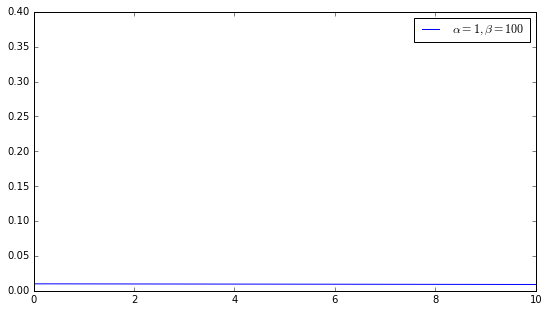

In [83]:
a = 1
b = 100
plt.figure(figsize=(9, 5))
label = '$\\alpha =' + str(a) + ', \\beta = ' + str(b) + '$'
plt.plot(grid, sps.gamma(a, scale=b).pdf(grid), label=label)
plt.legend(loc='best')
plt.ylim((0, 0.4))
plt.show()

In [85]:
broken = np.array([])
for i in range(0, len(events)):
    s, type = events[i]
    # Будем для каждого момента времени s
    # Пересчитывать количество сломавшихся серверов
    if (type == 1):
        broken = np.append(broken, s - np.sum(broken))
        print('%f\tbreak' % (s))
    else:
        # Оценим lambda
        l = (a + len(broken) - 1) / (b + np.sum(broken)) 
        # Зная его посчитаем условное матожидание
        print('%f\t%f' % (s, l * (t - event[0]) + len(broken)))
    time.sleep(events[i + 1][0] - s)

0.000000	0.000000
0.436000	break
1.000000	1.435611
2.000000	1.435611
3.000000	1.435611
4.000000	1.435611
5.000000	1.435611
6.000000	1.435611
7.000000	1.435611
8.000000	1.435611
9.000000	1.435611
10.000000	1.435611
10.224000	break
11.000000	2.793856
11.709000	break
12.000000	4.174955
12.607000	break
13.000000	5.554113
14.000000	5.554113
15.000000	5.554113
16.000000	5.554113
16.249000	break
17.000000	6.881780
18.000000	6.881780
19.000000	6.881780
20.000000	6.881780
21.000000	6.881780
22.000000	6.881780
23.000000	6.881780
23.118000	break
23.518000	break
24.000000	9.479452
25.000000	9.479452
25.553000	break
26.000000	10.787731
27.000000	10.787731
27.485000	break
28.000000	12.088669
29.000000	12.088669
30.000000	12.088669
30.816000	break
31.000000	13.344469
31.787000	break
32.000000	14.651809
33.000000	14.651809
34.000000	14.651809
34.026000	break
35.000000	15.917240
36.000000	15.917240
36.772000	break
37.000000	17.158475
38.000000	17.158475
39.000000	17.158475
39.204000	break
39.683000	bre